In [1]:
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

from sklearn import svm

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'NanumGothicCoding'

from visualize import plot_confusion_matrix

# Which one are you analyzing?

## M_0

In [2]:
df = pd.read_csv('Data_M_0.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
              
             'gasoline_fuel_type',
             'gasoline_old',
              'diesel_fuel_type',
             'diesel_old',
              'electric_fuel_type',
             'electric_old',
              'hydrogen_fuel_type',
             'hydrogen_old',
             ],
             axis='columns')
print(df.shape)
df.head()

(4128, 46)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,diesel_fuel_cost,diesel_price,electric_car_class,electric_infra,electric_fuel_cost,electric_price,hydrogen_car_class,hydrogen_infra,hydrogen_fuel_cost,hydrogen_price
0,3,3,2,31,1,1,10000,3,3,7,...,150,4000,1,50,100,4000,0,100,100,4000
1,3,3,2,31,1,1,10000,3,3,7,...,50,3000,1,50,50,4000,0,100,50,4000
2,3,3,2,31,1,1,10000,3,3,7,...,150,2000,1,100,50,5000,1,100,150,3000
3,3,3,2,31,1,1,10000,3,3,7,...,100,5000,1,100,150,5000,0,50,150,5000
4,3,3,2,31,1,1,10000,3,3,7,...,50,2000,0,100,100,2000,1,100,50,3000


In [3]:
NUMERICAL_COLUMNS = [
    'policy',
    'eco',
    'tech',
    'age',
    'owning',
    'mileage',
    'family',
    'wealth',

    'gasoline_infra',
    'gasoline_fuel_cost',
    'gasoline_price',
    'diesel_infra',
    'diesel_fuel_cost',
    'diesel_price',
    'electric_infra',
    'electric_fuel_cost',
    'electric_price',
    'hydrogen_infra',
    'hydrogen_fuel_cost',
    'hydrogen_price',
]

CATEGORICAL_COLUMNS= [
    'gender',
    'job',
    
    'Car1_fuel_type',
    'Car1_car_class',
    'Car1_infra',
    'Car1_fuel_cost',
    'Car1_price',
    'Car1_old',
    'Car2_fuel_type',
    'Car2_car_class',
    'Car2_infra',
    'Car2_fuel_cost',
    'Car2_price',
    'Car2_old',
    'Car3_fuel_type',
    'Car3_car_class',
    'Car3_infra',
    'Car3_fuel_cost',
    'Car3_price',
    'Car3_old',
    
    'gasoline_car_class',
    'diesel_car_class',
    'electric_car_class',
    'hydrogen_car_class',
]
TARGET_COLUMNS = [
    'choice',
]

In [4]:
target_names = [
    'SQ',
    'SQ_gasoline',
    'SQ_diesel',
    'SQ_electric',
    'SQ_hydrogen',
    '1_gasoline',
    '1_diesel',
    '1_electric',
    '1_hydrogen',
    '2_gasoline',
    '2_diesel',
    '2_electric',
    '2_hydrogen',
    '3_gasoline',
    '3_diesel',
    '3_electric',
    '3_hydrogen',
]

## M_1

In [2]:
df = pd.read_csv('Data_M_1.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
              
             'gasoline_old',
              'diesel_fuel_type',
             'diesel_old',
              'electric_fuel_type',
             'electric_old',
              'hydrogen_fuel_type',
             'hydrogen_old',
             ],
             axis='columns')
print(df.shape)
df.head()

(4128, 45)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,diesel_fuel_cost,diesel_price,electric_car_class,electric_infra,electric_fuel_cost,electric_price,hydrogen_car_class,hydrogen_infra,hydrogen_fuel_cost,hydrogen_price
0,3,3,2,31,1,1,10000,3,3,7,...,150,4000,1,50,100,4000,0,100,100,4000
1,3,3,2,31,1,1,10000,3,3,7,...,50,3000,1,50,50,4000,0,100,50,4000
2,3,3,2,31,1,1,10000,3,3,7,...,150,2000,1,100,50,5000,1,100,150,3000
3,3,3,2,31,1,1,10000,3,3,7,...,100,5000,1,100,150,5000,0,50,150,5000
4,3,3,2,31,1,1,10000,3,3,7,...,50,2000,0,100,100,2000,1,100,50,3000


In [66]:
NUMERICAL_COLUMNS = [
#     'policy',
#     'eco',
#     'tech',
#     'age',
#     'owning',
#     'mileage',
#     'family',
#     'wealth',

    'gasoline_infra',
    'gasoline_fuel_cost',
    'gasoline_price',
    'diesel_infra',
    'diesel_fuel_cost',
    'diesel_price',
    'electric_infra',
    'electric_fuel_cost',
    'electric_price',
    'hydrogen_infra',
    'hydrogen_fuel_cost',
    'hydrogen_price',
]

CATEGORICAL_COLUMNS= [
#     'gender',
#     'job',
    
    'Car1_fuel_type',
    'Car1_car_class',
    'Car1_infra',
    'Car1_fuel_cost',
    'Car1_price',
    'Car1_old',
    'Car2_fuel_type',
    'Car2_car_class',
    'Car2_infra',
    'Car2_fuel_cost',
    'Car2_price',
    'Car2_old',
    'Car3_fuel_type',
    'Car3_car_class',
    'Car3_infra',
    'Car3_fuel_cost',
    'Car3_price',
    'Car3_old',
    
    'gasoline_car_class',
    'diesel_car_class',
    'electric_car_class',
    'hydrogen_car_class',
]
TARGET_COLUMNS = [
    'answer',
]

In [67]:
target_names = [
    'gasoline',
    'diesel',
    'electric',
    'hydrogen',
]

# M_2

In [2]:
df = pd.read_csv('Data_M_2.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
             ],
             axis='columns')
print(df.shape)
df.head()

(4128, 33)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,Car3_fuel_type,Car3_car_class,Car3_infra,Car3_fuel_cost,Car3_price,Car3_old,p_infra,p_class,p_fuel_cost,p_price
0,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,50,1,50,4000
1,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,100,1,50,5000
2,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,100,1,150,5000
3,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,100,1,50,2000
4,3,3,2,31,1,1,10000,3,3,7,...,0,0,0,0,0,0,50,2,50,5000


In [3]:
NUMERICAL_COLUMNS = [
#     'policy',
#     'eco',
#     'tech',
#     'age',
#     'owning',
#     'mileage',
#     'family',
#     'wealth',
    
    'p_infra',
    'p_class',
    'p_fuel_cost',
    'p_price',
]

CATEGORICAL_COLUMNS= [
#     'gender',
#     'job',
    
    'Car1_fuel_type',
    'Car1_car_class',
    'Car1_infra',
    'Car1_fuel_cost',
    'Car1_price',
    'Car1_old',
    'Car2_fuel_type',
    'Car2_car_class',
    'Car2_infra',
    'Car2_fuel_cost',
    'Car2_price',
    'Car2_old',
    'Car3_fuel_type',
    'Car3_car_class',
    'Car3_infra',
    'Car3_fuel_cost',
    'Car3_price',
    'Car3_old',
]
TARGET_COLUMNS = [
    'choice',
]

In [4]:
target_names = [
    'Not Purchasing',
    'Additional Purchase',
    'Exchanging Purchase',
]

# M_3

In [339]:
df = pd.read_csv('Data_M_3.csv')
df = df.drop(['pid',
              'Type',
             'recent_by',
             'own_sedan',
             'own_suv',
             'own_ice',
             'own_zev',
             'oldest_car',
             ],
             axis='columns')
print(df.shape)
df.head()

(378, 34)


,policy,eco,tech,age,gender,owning,mileage,family,job,wealth,...,Car3_car_class,Car3_infra,Car3_fuel_cost,Car3_price,Car3_old,p_fuel_type,p_infra,p_class,p_fuel_cost,p_price
0,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,50,1,50,4000
1,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,100,1,50,5000
2,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,100,1,150,5000
3,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,100,2,100,2000
4,3,4,3,56,1,2,30000,2,9,4,...,0,0,0,0,0,3,10,2,150,3000


In [409]:
NUMERICAL_COLUMNS = [
#     'policy',
#     'eco',
#     'tech',
#     'age',
#     'owning',
#     'mileage',
#     'family',
#     'wealth',
    
#     'p_infra',
#     'p_class',
#     'p_fuel_cost',
#     'p_price',
]

CATEGORICAL_COLUMNS= [
#     'gender',
#     'job',
    
    'Car1_fuel_type',
    'Car1_car_class',
    'Car1_infra',
    'Car1_fuel_cost',
    'Car1_price',
    'Car1_old',
    'Car2_fuel_type',
    'Car2_car_class',
    'Car2_infra',
    'Car2_fuel_cost',
    'Car2_price',
    'Car2_old',
    'Car3_fuel_type',
    'Car3_car_class',
    'Car3_infra',
    'Car3_fuel_cost',
    'Car3_price',
    'Car3_old',
]
TARGET_COLUMNS = [
    'choice',
]

In [410]:
target_names = [
    'Car1',
    'Car2',
    'Car3',
]

# Analyzing Starts Here

In [5]:
#BINARY = False
TARGET_COLUMN = TARGET_COLUMNS[0]

FEATURE_NAMES = NUMERICAL_COLUMNS[:]
X_numerical = df[NUMERICAL_COLUMNS].values

num_categories = []
X_categorical = []
for column in CATEGORICAL_COLUMNS:
    df_column = df[column]
    X_column = df_column.map({value:i for i, value in enumerate(sorted(list(set(df_column))))}).values
    X_categorical.append(X_column.reshape(-1, 1))
    num_categories.append(len(set(X_column)))
#    print(FEATURE_NAMES)
#    print(column)
#    print(df_column)
    FEATURE_NAMES += [column + '_' + str(value) for value in sorted(list(set(df_column)))]
X_categorical = np.hstack(X_categorical)

one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(
    X_categorical
).toarray()
assert sum(num_categories) == X_categorical.shape[1]

X = np.hstack([X_numerical, X_categorical])
assert X.shape[1] == len(FEATURE_NAMES)

# if BINARY:
#     y = (df[TARGET_COLUMN].values == 4).astype(np.int32)
# else:
#     y = df[TARGET_COLUMN].values

y = df[TARGET_COLUMN]
#y, target_names = y.factorize()

print(X.shape, y.shape)

(4128, 78) (4128,)


In [6]:
Counter(y)

Counter({1: 1994, 3: 1676, 2: 458})

In [7]:
len(FEATURE_NAMES)

78

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
Counter(y_test)

Counter({1: 603, 3: 503, 2: 133})

In [10]:
print(target_names)

['Not Purchasing', 'Additional Purchase', 'Exchanging Purchase']


In [11]:
Counter(y_train)

Counter({1: 1391, 3: 1173, 2: 325})

### Decision Tree

In [418]:
clf = DecisionTreeClassifier(max_depth=5)
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

        Car1       0.79      0.73      0.76        63
        Car2       0.66      0.77      0.71        48
        Car3       0.00      0.00      0.00         3

    accuracy                           0.73       114
   macro avg       0.48      0.50      0.49       114
weighted avg       0.72      0.73      0.72       114



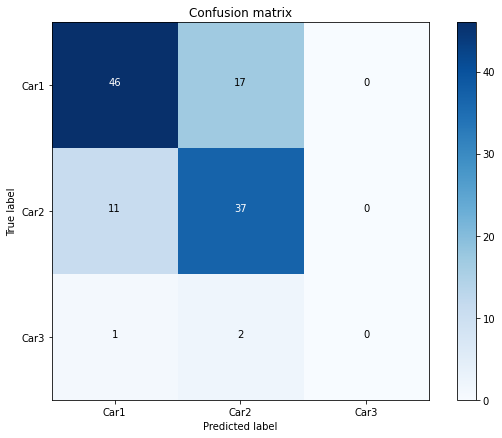

In [420]:
print(classification_report(y_test, y_pred, target_names=target_names,))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, )

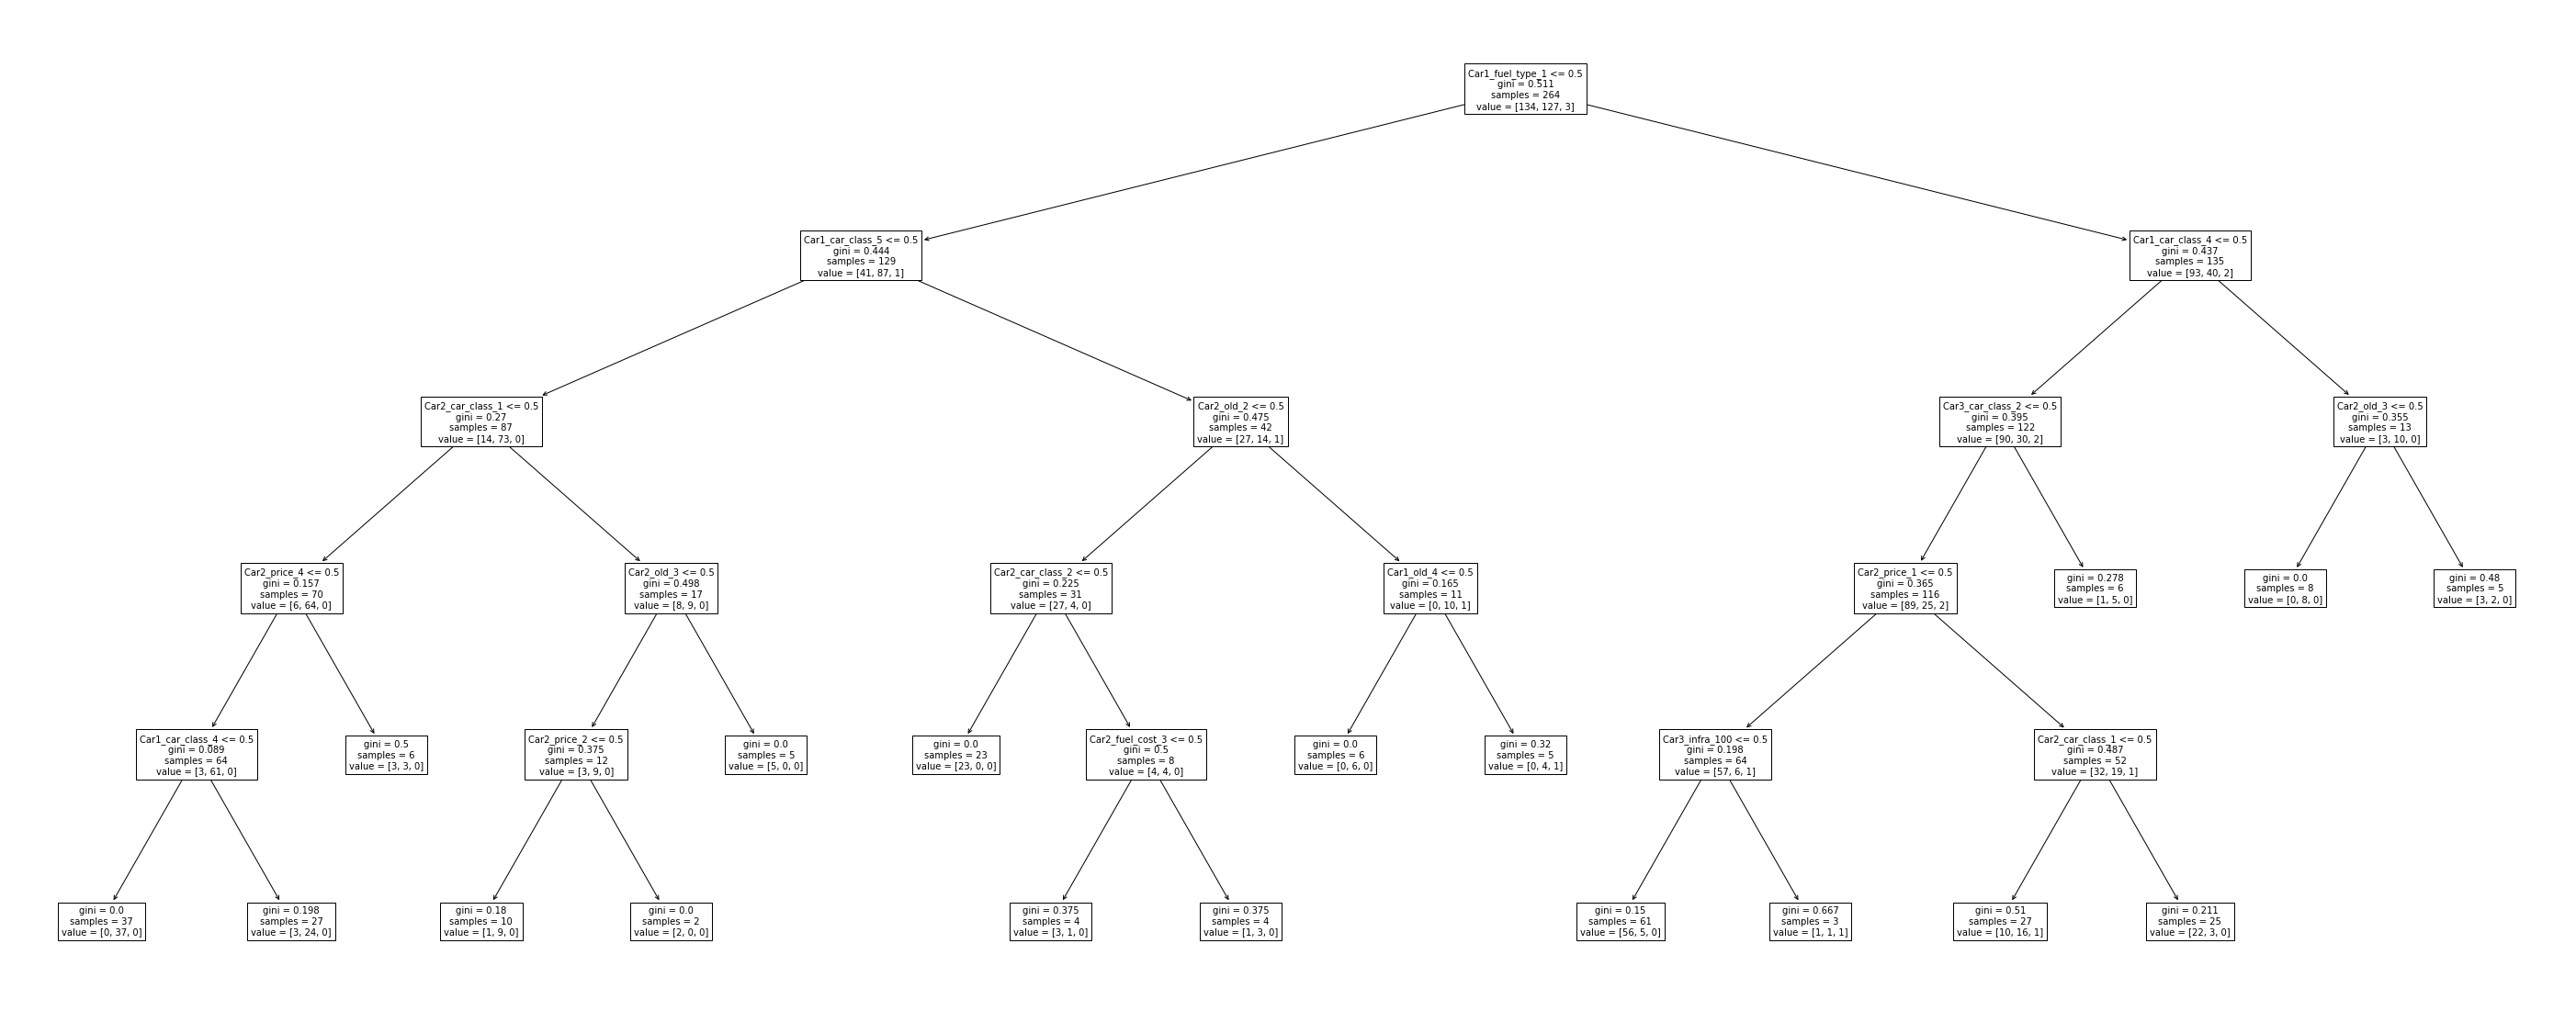

In [421]:
fig, ax = plt.subplots(figsize=(50, 20))
plot_tree(clf, feature_names=FEATURE_NAMES, fontsize=10, ax=ax)
fig.savefig('tree.png')

### Random Forest

In [12]:
clf = RandomForestClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [15]:
X.shape, y.shape

((4128, 78), (4128,))

                     precision    recall  f1-score   support

     Not Purchasing       0.45      0.67      0.54       346
Additional Purchase       0.00      0.00      0.00        91
Exchanging Purchase       0.50      0.35      0.41       389

           accuracy                           0.45       826
          macro avg       0.32      0.34      0.32       826
       weighted avg       0.42      0.45      0.42       826



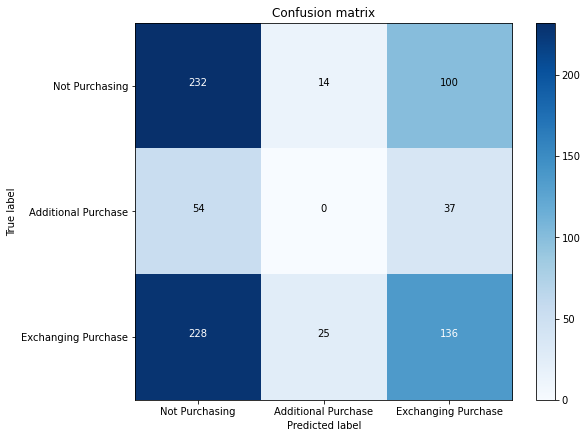

                     precision    recall  f1-score   support

     Not Purchasing       0.57      0.58      0.57       431
Additional Purchase       0.08      0.03      0.04       104
Exchanging Purchase       0.36      0.43      0.39       291

           accuracy                           0.46       826
          macro avg       0.34      0.35      0.34       826
       weighted avg       0.43      0.46      0.44       826



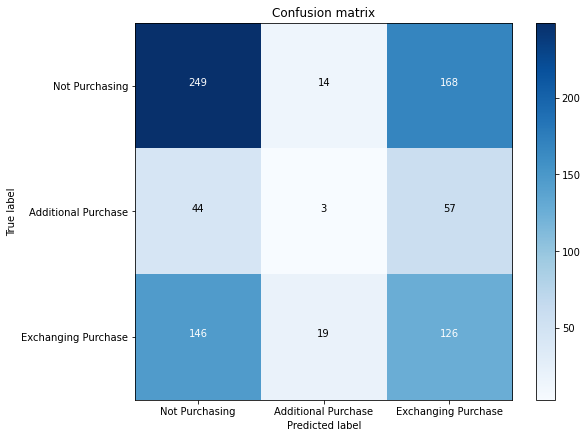

                     precision    recall  f1-score   support

     Not Purchasing       0.52      0.58      0.55       406
Additional Purchase       0.26      0.11      0.16        87
Exchanging Purchase       0.45      0.46      0.45       333

           accuracy                           0.48       826
          macro avg       0.41      0.38      0.39       826
       weighted avg       0.47      0.48      0.47       826



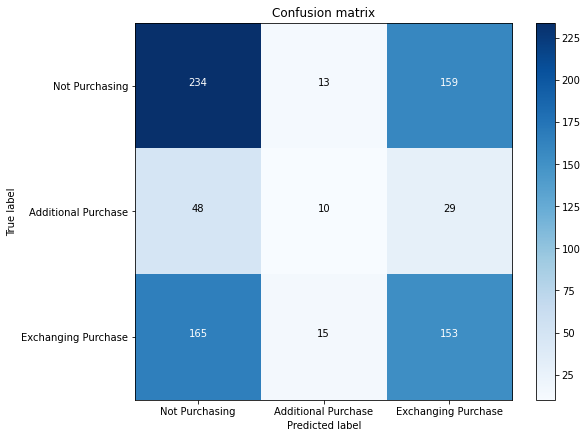

                     precision    recall  f1-score   support

     Not Purchasing       0.57      0.58      0.57       440
Additional Purchase       0.18      0.13      0.15        61
Exchanging Purchase       0.39      0.40      0.39       324

           accuracy                           0.48       825
          macro avg       0.38      0.37      0.37       825
       weighted avg       0.47      0.48      0.47       825



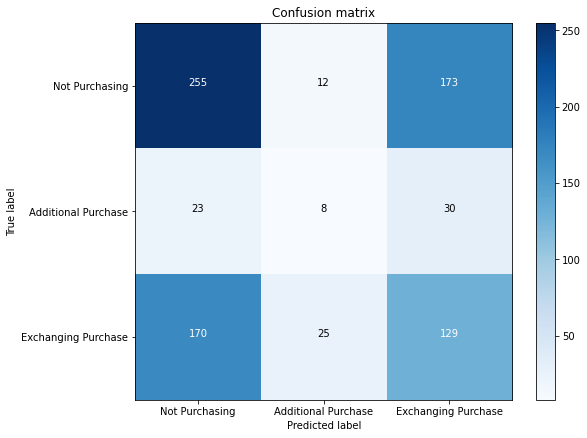

                     precision    recall  f1-score   support

     Not Purchasing       0.48      0.53      0.50       371
Additional Purchase       0.14      0.10      0.12       115
Exchanging Purchase       0.44      0.43      0.44       339

           accuracy                           0.43       825
          macro avg       0.35      0.35      0.35       825
       weighted avg       0.42      0.43      0.42       825



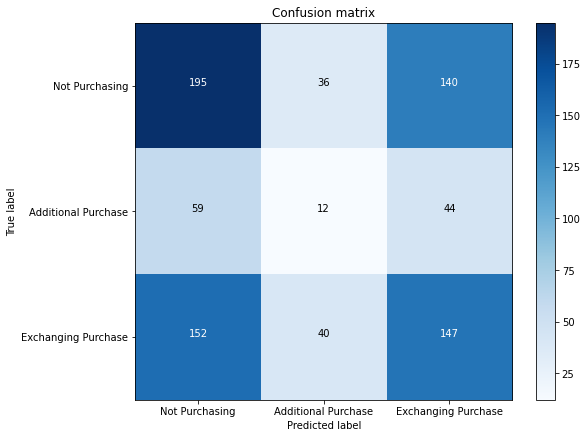

In [17]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    plot_confusion_matrix(y_test, y_pred, target_names=target_names)

In [22]:
import numpy as np
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=3, shuffle=False, random_state=None)
print(cross_val_score(clf, X, y, cv=cv, scoring='f1_macro', verbose=20))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.327) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END ................................ score: (test=0.342) total time=   0.7s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END ................................ score: (test=0.364) total time=   0.7s
[0.32717627 0.34168999 0.36362054]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


                     precision    recall  f1-score   support

     Not Purchasing       0.67      0.67      0.67       603
Additional Purchase       0.41      0.34      0.37       133
Exchanging Purchase       0.61      0.64      0.62       503

           accuracy                           0.62      1239
          macro avg       0.56      0.55      0.56      1239
       weighted avg       0.62      0.62      0.62      1239



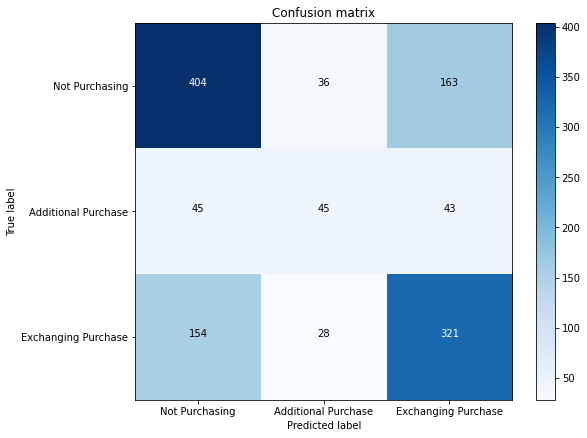

In [14]:
print(classification_report(y_test, y_pred, target_names=target_names,))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, )

In [425]:
print(classification_report(y_test, y_pred, target_names=target_names, labels=list(range(len(target_names)))))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, #labels=list(range(len(target_names))))

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_19368/4248554800.py, line 2)

In [426]:
cumsum_num_categories = [0] + list(np.cumsum(num_categories))

importances = clf.feature_importances_
numerical_importances = importances[:len(NUMERICAL_COLUMNS)]
categorical_importances = []
for start_index, end_index in zip(cumsum_num_categories[:-1], cumsum_num_categories[1:]):
    categorical_importances.append(sum(importances[len(NUMERICAL_COLUMNS):][start_index:end_index]))

sum(numerical_importances) + sum(categorical_importances)

0.9999999999999999

In [427]:
print('Numerical')
for i in np.argsort(numerical_importances)[::-1]:
    print(f'{numerical_importances[i]:.3f}', NUMERICAL_COLUMNS[i])

Numerical


In [428]:
print('Categorical')
for i in np.argsort(categorical_importances)[::-1]:
    print(f'{categorical_importances[i]:.3f}', f'{num_categories[i]:3d}', CATEGORICAL_COLUMNS[i])

Categorical
0.129   6 Car1_car_class
0.124   4 Car2_old
0.110   6 Car2_car_class
0.088   4 Car1_fuel_type
0.088   4 Car2_fuel_cost
0.085   4 Car1_fuel_cost
0.075   4 Car2_price
0.073   4 Car1_price
0.073   4 Car2_fuel_type
0.054   4 Car1_old
0.036   2 Car1_infra
0.012   2 Car3_infra
0.011   4 Car3_car_class
0.010   4 Car3_old
0.010   3 Car3_price
0.008   2 Car2_infra
0.007   3 Car3_fuel_type
0.005   4 Car3_fuel_cost


## SVM

In [429]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

        Car1       0.88      0.73      0.80        63
        Car2       0.69      0.90      0.78        48
        Car3       0.00      0.00      0.00         3

    accuracy                           0.78       114
   macro avg       0.53      0.54      0.53       114
weighted avg       0.78      0.78      0.77       114



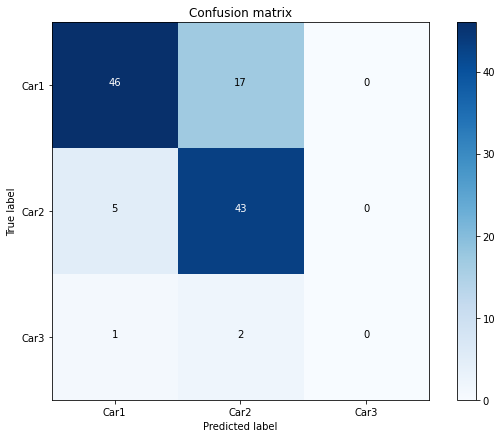

In [430]:
print(classification_report(y_test, y_pred, target_names=target_names,))
plot_confusion_matrix(y_test, y_pred, target_names=target_names, )

#### MNL

In [99]:
clf = LogisticRegression()
y_pred = clf.fit(X_train, y_train).predict(X_test)

              precision    recall  f1-score   support

        Car1       0.00      0.00      0.00         0
        Car2       0.44      0.25      0.32        63
        Car3       0.38      0.62      0.48        48

   micro avg       0.40      0.41      0.41       111
   macro avg       0.28      0.29      0.27       111
weighted avg       0.42      0.41      0.39       111



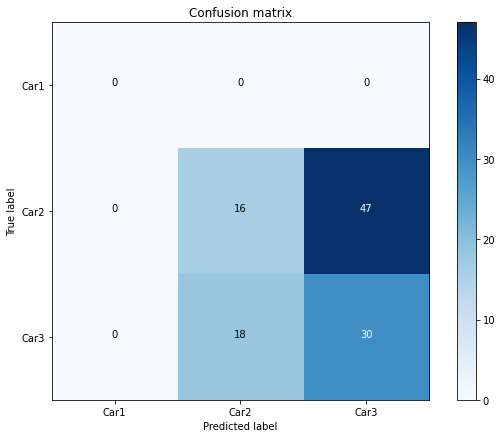

In [100]:
print(classification_report(y_test, y_pred,target_names=target_names, labels=list(range(len(target_names)))))
plot_confusion_matrix(y_test, y_pred,target_names=target_names, labels=list(range(len(target_names))))

In [101]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 choice   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     7.600
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.52e-27
Time:                        14:48:58   Log-Likelihood:                -57.654
No. Observations:                 264   AIC:                             227.3
Df Residuals:                     208   BIC:                             427.6
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1775      0.030      5.842      0.0

In [102]:
import statsmodels.api as sm

X2 = sm.add_constant(pd.DataFrame(X_train, columns=FEATURE_NAMES))
est = sm.OLS(list(y_train), X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     7.600
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.52e-27
Time:                        14:49:00   Log-Likelihood:                -57.654
No. Observations:                 264   AIC:                             227.3
Df Residuals:                     208   BIC:                             427.6
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1775      0.030  